![Alt text](https://imgur.com/orZWHly.png=80)
source: @allison_horst https://github.com/allisonhorst/penguins

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! The data is available in csv-Format as `penguins.csv`

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

Column | Description
--- | ---
culmen_length_mm | culmen length (mm)
culmen_depth_mm | culmen depth (mm)
flipper_length_mm | flipper length (mm)
body_mass_g | body mass (g)
sex | penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are **at least three** species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**.  Your task is to apply your data science skills to help them identify groups in the dataset!

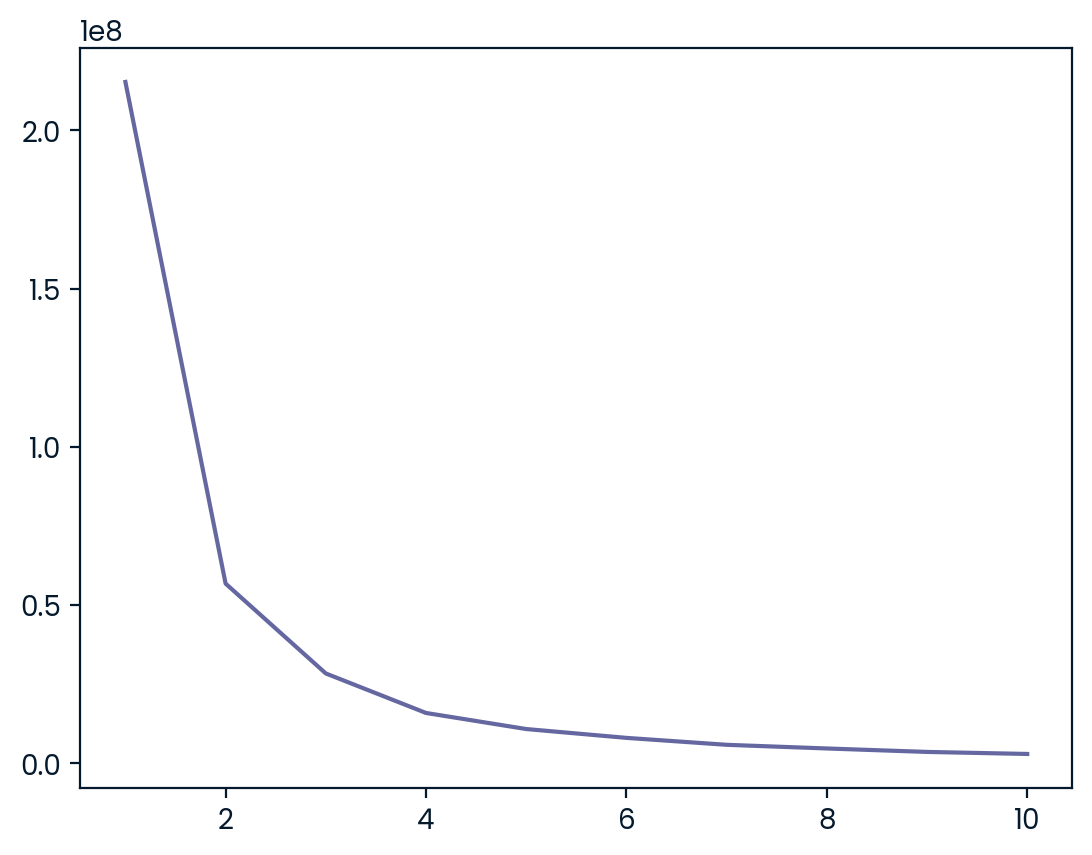

0    106
2     95
1     76
3     55
Name: predicted_label, dtype: int64
   predicted_label  mean_culmen_length_mm  mean_culmen_depth_mm  \
0                0              43.570755             18.433962   
1                1              45.457895             15.661842   
2                2              40.101053             17.743158   
3                3              49.674545             15.725455   

   mean_flipper_length_mm  mean_body_mass_g  
0              195.141509       3936.320755  
1              209.631579       4710.526316  
2              188.557895       3327.894737  
3              221.709091       5548.181818  


In [1]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
pd.set_option('display.max_columns', None)

# Loading and examining the dataset
penguins_df = pd.read_csv("penguins.csv")
penguins_df.head()

# drop sex?
penguins_df = penguins_df.drop('sex', axis = 'columns')

clusters = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
inertia_vals = []

# calculate number of clusters
for n in clusters:
    model = KMeans(n_clusters = n)
    model.fit(penguins_df)
    inertia_vals.append(model.inertia_)
    
plt.plot(clusters, inertia_vals)
plt.show()

# n_clusters = 4?
model = KMeans(n_clusters = 4)
model.fit(penguins_df)

# predict labels
labels = model.predict(penguins_df)
penguins_df['predicted_label'] = labels

print(penguins_df['predicted_label'].value_counts())

# group by labels and calculate mean of variables
stat_penguins = penguins_df.groupby('predicted_label').agg(mean_culmen_length_mm = ('culmen_length_mm', 'mean'), mean_culmen_depth_mm = ('culmen_depth_mm', 'mean'), mean_flipper_length_mm = ('flipper_length_mm', 'mean'), mean_body_mass_g = ('body_mass_g', 'mean')).reset_index()
print(stat_penguins)